In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
import matplotlib.pyplot as plt

In [12]:
X_data = np.loadtxt("data/X_data.csv", delimiter=",")
X_data.shape

(1000, 38400)

In [13]:
X_data

array([[  0.28048742,   3.72830677,   3.19126654, ..., -45.90468216,
        -45.90468216, -42.39907837],
       [ -2.58110476,  13.3120842 ,   2.01552916, ..., -49.64926147,
        -49.64926147, -37.44506454],
       [ -2.15358114,  -7.61195707,  -4.13224602, ..., -50.49839783,
        -50.49839783, -35.67107391],
       ...,
       [-15.86331844, -12.50350857, -28.52645874, ..., -58.88102722,
        -58.88102722, -31.27197647],
       [ -4.51956177,  -9.57658386,  -3.12049174, ..., -54.87487793,
        -54.87487793, -51.62145996],
       [-21.03319359, -23.70036888, -20.64584732, ..., -60.84477997,
        -60.84477997, -60.84477997]])

In [14]:
y_data = np.loadtxt("data/y_data.csv", dtype=str)
y_data.shape

(1000,)

In [15]:
y_data

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [16]:
labels = np.unique(y_data)
labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

In [17]:
y_data2 = np.zeros((y_data.shape[0], len(labels)))

for i, label in enumerate(labels):
    for j in range(y_data.shape[0]):
        if y_data[j] == label:
            y_data2[j][i] = 1
            
y_data2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
X_data2 = X_data2.reshape(1000, 128, 300)
print(X_data2.shape)
print(X_data2[:3])

(1000, 128, 300)
[[[  0.28048742   3.72830677   3.19126654 ...   6.14212751  -1.98371422
    12.92064667]
  [  3.10127735  14.22969437  11.79866219 ...  10.4456377    5.20716858
    15.11762428]
  [ -4.39976215  10.78109169  12.30222225 ...  -0.17950238   6.4920702
    13.78956223]
  ...
  [-45.90468216 -45.90468216 -45.90468216 ... -45.90468216 -45.90468216
   -42.06035614]
  [-45.90468216 -45.90468216 -45.90468216 ... -45.90468216 -45.90468216
   -42.29415131]
  [-45.90468216 -45.90468216 -45.90468216 ... -45.90468216 -45.90468216
   -42.39907837]]

 [[ -2.58110476  13.3120842    2.01552916 ...   0.45536363  12.62303734
     9.48605347]
  [ -1.35699916  24.61754227  13.61273861 ...   8.17651463  18.54008102
    16.74104881]
  [ -7.55361128  19.53930855  14.08666611 ...   8.84458733  11.41815948
    13.66756248]
  ...
  [-49.64926147 -49.64926147 -49.64926147 ... -49.64926147 -49.64926147
   -37.22035217]
  [-49.64926147 -49.64926147 -49.64926147 ... -49.64926147 -49.64926147
   -37.3

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data2, y_data2, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 128, 300)
(200, 128, 300)
(800, 10)
(200, 10)


In [121]:
nn_input = keras.Input(shape=(128,300))

x = keras.layers.LSTM(128, input_shape=(128,300), return_sequences=True)(nn_input)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.LSTM(128)(x)

x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

predictions = keras.layers.Dense(len(labels), activation='softmax')(x)
    
model = keras.Model(inputs=nn_input, outputs=predictions)

In [122]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128, 300)]        0         
                                                                 
 lstm_46 (LSTM)              (None, 128, 128)          219648    
                                                                 
 dropout_31 (Dropout)        (None, 128, 128)          0         
                                                                 
 lstm_47 (LSTM)              (None, 128)               131584    
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 10)                129

In [123]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy'])

In [124]:
epochs=1

for epoch in range(epochs):

    history = model.fit(
      X_train,
      y_train,
      epochs=20, 
      batch_size=64,
      validation_split=0.10
        )

Epoch 1/20
12/12 [==============================] - 20s 687ms/step - loss: 2.3349 - accuracy: 0.0944 - val_loss: 2.2957 - val_accuracy: 0.1125
Epoch 2/20
12/12 [==============================] - 6s 513ms/step - loss: 2.2758 - accuracy: 0.1514 - val_loss: 2.3101 - val_accuracy: 0.1375
Epoch 3/20
12/12 [==============================] - 5s 435ms/step - loss: 2.2672 - accuracy: 0.1528 - val_loss: 2.2360 - val_accuracy: 0.1875
Epoch 4/20
12/12 [==============================] - 5s 453ms/step - loss: 2.1938 - accuracy: 0.2028 - val_loss: 2.2015 - val_accuracy: 0.2250
Epoch 5/20
12/12 [==============================] - 6s 490ms/step - loss: 2.0993 - accuracy: 0.2431 - val_loss: 2.1378 - val_accuracy: 0.2250
Epoch 6/20
12/12 [==============================] - 7s 536ms/step - loss: 2.0575 - accuracy: 0.2458 - val_loss: 2.2708 - val_accuracy: 0.2125
Epoch 7/20
12/12 [==============================] - 6s 509ms/step - loss: 1.9120 - accuracy: 0.3042 - val_loss: 2.1465 - val_accuracy: 0.2625
Epoch

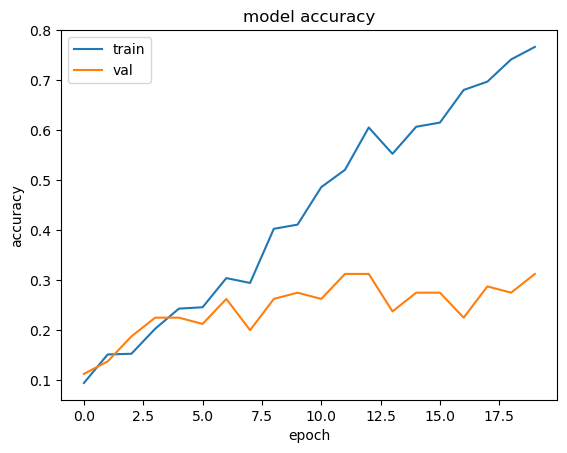

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

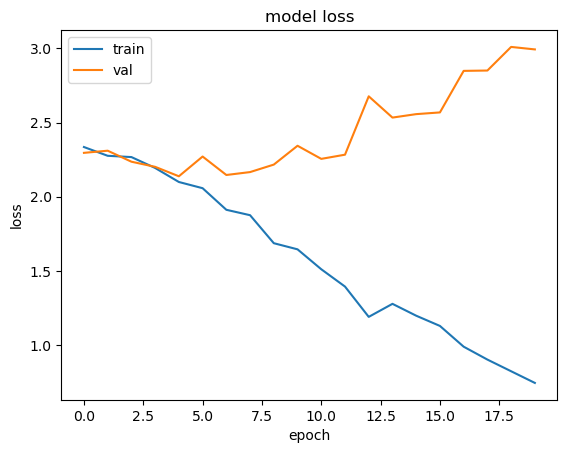

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [127]:
score = model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 3.317 and val_acc = 0.260


In [128]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred

7/7 [==============================] - 4s 103ms/step
(200, 10)


array([[4.4333198e-04, 8.6115993e-05, 3.4147594e-02, ..., 4.8045706e-04,
        9.1733235e-01, 7.4237725e-04],
       [6.3926071e-02, 3.5005269e-04, 3.2531093e-03, ..., 7.1918781e-05,
        3.1239737e-04, 1.1402854e-02],
       [2.9528381e-02, 8.3428705e-01, 4.3255230e-03, ..., 6.3262018e-04,
        4.0446185e-03, 2.2558073e-02],
       ...,
       [9.4204197e-06, 1.6434337e-06, 2.0693669e-05, ..., 9.8908222e-01,
        1.2537056e-04, 1.4955446e-04],
       [5.2895313e-03, 5.7875516e-04, 1.3317434e-01, ..., 5.8323040e-04,
        7.6878238e-01, 2.2805124e-03],
       [2.2462457e-02, 1.4706386e-02, 2.2240567e-01, ..., 1.6105393e-03,
        2.3175514e-01, 1.7229028e-02]], dtype=float32)

In [129]:
y_classes = y_pred.argmax(1)
y_classes[:15]

array([8, 6, 1, 4, 7, 6, 2, 4, 5, 4, 4, 2, 6, 6, 4], dtype=int64)

In [130]:
y_test2 = y_test.argmax(1)
y_test2[:15]

array([1, 9, 1, 6, 7, 6, 3, 9, 5, 4, 3, 0, 6, 2, 2], dtype=int64)

In [131]:
import sklearn.metrics as mt

accuracy = mt.accuracy_score(y_test2, y_classes)
precision = mt.precision_score(y_test2, y_classes, average = "macro")
recall = mt.recall_score(y_test2, y_classes, average = "macro")
f1_score = mt.f1_score(y_test2, y_classes, average = "macro")
print("accuracy     : " + str(accuracy))
print("precision    : " + str(precision))
print("recall       : " + str(recall))
print("f1-score     : " + str(accuracy))

accuracy     : 0.26
precision    : 0.25343360641747736
recall       : 0.2761536193424738
f1-score     : 0.26


In [132]:
cm = mt.confusion_matrix(y_test2, y_classes)

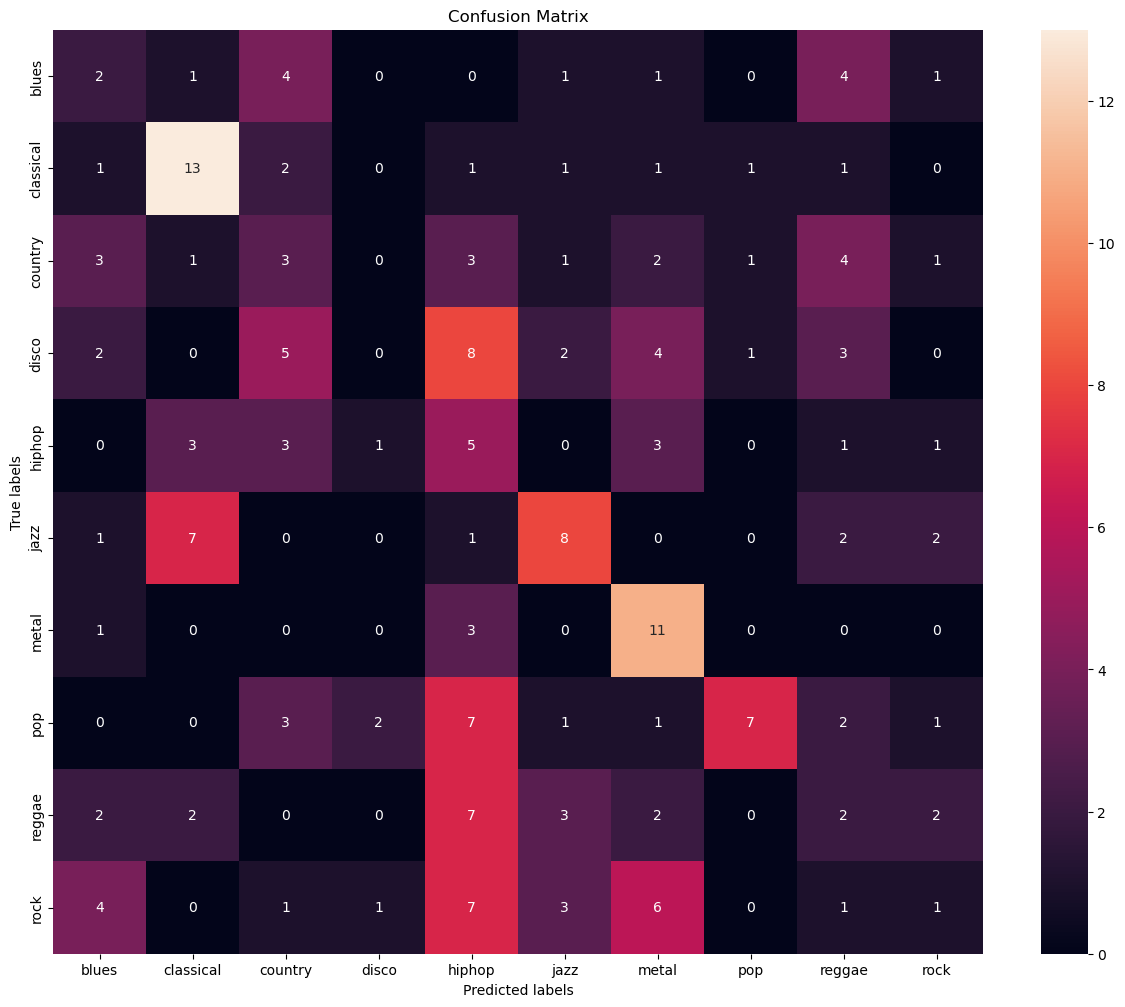

In [133]:
plt.figure(figsize=(15,12))
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);